In [ ]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', 90)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.neighbors import KNeighborsRegressor
import scipy.stats
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

Loading and reading the dataset

In [ ]:
df = pd.read_csv("/content/dataset_behaviour_disorders - Categorical.csv")

In [ ]:
df.head()

,ID,genHistory,hyperactivity,forgetfulness,disobeyInst,noDangerSense,antisocial,harmingNature,irrSleep,lowEsteem,repTempTantrum,noAttention,repeatWords,respNamesBy9months,noPlaywithOtherby36Months,noGestures12Months,unusualEating,chanceOfDisorder
0,1,lessOften,never,never,never,sometimes,sometimes,sometimes,lessOften,sometimes,sometimes,never,never,sometimes,lessOften,never,sometimes,low
1,2,never,lessOften,lessOften,lessOften,never,lessOften,lessOften,sometimes,lessOften,sometimes,never,sometimes,never,lessOften,sometimes,moreOften,low
2,3,moreOften,sometimes,sometimes,never,never,sometimes,sometimes,lessOften,never,never,moreOften,sometimes,moreOften,never,lessOften,moreOften,low
3,4,sometimes,sometimes,lessOften,sometimes,lessOften,lessOften,lessOften,never,moreOften,moreOften,sometimes,moreOften,moreOften,lessOften,sometimes,sometimes,high
4,5,sometimes,moreOften,moreOften,moreOften,never,never,never,lessOften,never,moreOften,moreOften,lessOften,never,moreOften,never,sometimes,low


In [ ]:
df.tail()

,ID,genHistory,hyperactivity,forgetfulness,disobeyInst,noDangerSense,antisocial,harmingNature,irrSleep,lowEsteem,repTempTantrum,noAttention,repeatWords,respNamesBy9months,noPlaywithOtherby36Months,noGestures12Months,unusualEating,chanceOfDisorder
494,495,moreOften,moreOften,moreOften,sometimes,never,never,never,lessOften,sometimes,sometimes,never,moreOften,moreOften,never,moreOften,sometimes,high
495,496,lessOften,moreOften,moreOften,sometimes,lessOften,sometimes,sometimes,moreOften,never,moreOften,sometimes,never,sometimes,moreOften,never,lessOften,high
496,497,lessOften,moreOften,lessOften,lessOften,moreOften,sometimes,sometimes,sometimes,moreOften,sometimes,never,lessOften,lessOften,moreOften,sometimes,never,low
497,498,sometimes,never,moreOften,lessOften,moreOften,never,never,never,sometimes,never,lessOften,never,never,sometimes,lessOften,sometimes,low
498,499,moreOften,lessOften,lessOften,never,never,lessOften,lessOften,never,never,lessOften,sometimes,moreOften,sometimes,sometimes,lessOften,lessOften,low


In [ ]:
df.shape

(499, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         499 non-null    int64 
 1   genHistory                 499 non-null    object
 2   hyperactivity              499 non-null    object
 3   forgetfulness              499 non-null    object
 4   disobeyInst                499 non-null    object
 5   noDangerSense              499 non-null    object
 6   antisocial                 499 non-null    object
 7   harmingNature              499 non-null    object
 8   irrSleep                   499 non-null    object
 9   lowEsteem                  499 non-null    object
 10  repTempTantrum             499 non-null    object
 11  noAttention                499 non-null    object
 12  repeatWords                499 non-null    object
 13  respNamesBy9months         499 non-null    object
 14  noPlaywith

In [ ]:
df= df.drop('ID', axis=1)

In [ ]:
df

,genHistory,hyperactivity,forgetfulness,disobeyInst,noDangerSense,antisocial,harmingNature,irrSleep,lowEsteem,repTempTantrum,noAttention,repeatWords,respNamesBy9months,noPlaywithOtherby36Months,noGestures12Months,unusualEating,chanceOfDisorder
0,lessOften,never,never,never,sometimes,sometimes,sometimes,lessOften,sometimes,sometimes,never,never,sometimes,lessOften,never,sometimes,low
1,never,lessOften,lessOften,lessOften,never,lessOften,lessOften,sometimes,lessOften,sometimes,never,sometimes,never,lessOften,sometimes,moreOften,low
2,moreOften,sometimes,sometimes,never,never,sometimes,sometimes,lessOften,never,never,moreOften,sometimes,moreOften,never,lessOften,moreOften,low
3,sometimes,sometimes,lessOften,sometimes,lessOften,lessOften,lessOften,never,moreOften,moreOften,sometimes,moreOften,moreOften,lessOften,sometimes,sometimes,high
4,sometimes,moreOften,moreOften,moreOften,never,never,never,lessOften,never,moreOften,moreOften,lessOften,never,moreOften,never,sometimes,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,moreOften,moreOften,moreOften,sometimes,never,never,never,lessOften,sometimes,sometimes,never,moreOften,moreOften,never,moreOften,sometimes,high
495,lessOften,moreOften,moreOften,sometimes,lessOften,sometimes,sometimes,moreOften,never,moreOften,sometimes,never,sometimes,moreOften,never,lessOften,high
496,lessOften,moreOften,lessOften,lessOften,moreOften,sometimes,sometimes,sometimes,moreOften,sometimes,never,lessOften,lessOften,moreOften,sometimes,never,low
497,sometimes,never,moreOften,lessOften,moreOften,never,never,never,sometimes,never,lessOften,never,never,sometimes,lessOften,sometimes,low


EDA

Countplot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


moreOften    145
sometimes    121
never        121
lessOften    112
Name: unusualEating, dtype: int64

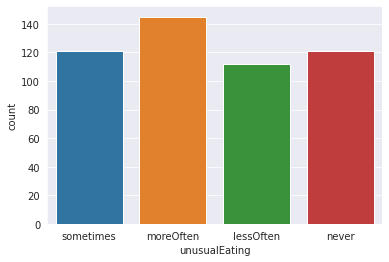

In [ ]:
sns.countplot(df['unusualEating'])
df['unusualEating'].value_counts()

pichart

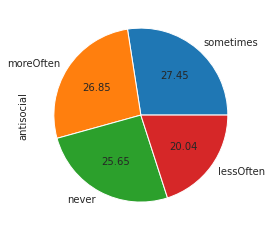

In [ ]:
df['antisocial'].value_counts().plot(kind='pie', autopct='%.2f')

For categorical data(multivariate)

In [ ]:
df.head()

,genHistory,hyperactivity,forgetfulness,disobeyInst,noDangerSense,antisocial,harmingNature,irrSleep,lowEsteem,repTempTantrum,noAttention,repeatWords,respNamesBy9months,noPlaywithOtherby36Months,noGestures12Months,unusualEating,chanceOfDisorder
0,lessOften,never,never,never,sometimes,sometimes,sometimes,lessOften,sometimes,sometimes,never,never,sometimes,lessOften,never,sometimes,low
1,never,lessOften,lessOften,lessOften,never,lessOften,lessOften,sometimes,lessOften,sometimes,never,sometimes,never,lessOften,sometimes,moreOften,low
2,moreOften,sometimes,sometimes,never,never,sometimes,sometimes,lessOften,never,never,moreOften,sometimes,moreOften,never,lessOften,moreOften,low
3,sometimes,sometimes,lessOften,sometimes,lessOften,lessOften,lessOften,never,moreOften,moreOften,sometimes,moreOften,moreOften,lessOften,sometimes,sometimes,high
4,sometimes,moreOften,moreOften,moreOften,never,never,never,lessOften,never,moreOften,moreOften,lessOften,never,moreOften,never,sometimes,low


clustermap

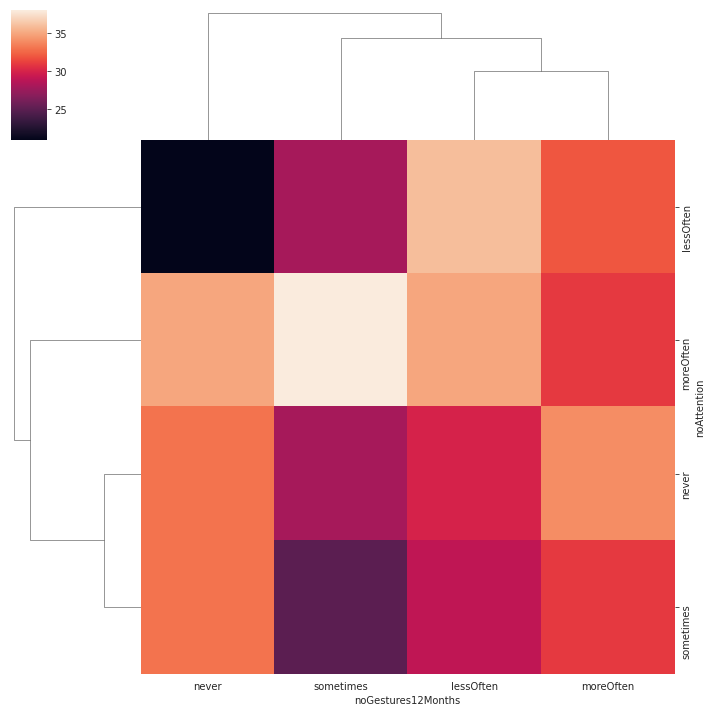

In [ ]:
sns.clustermap(pd.crosstab(df['noAttention'], df['noGestures12Months']))

Feature Engineering

In [ ]:
df = df.astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   genHistory                 499 non-null    category
 1   hyperactivity              499 non-null    category
 2   forgetfulness              499 non-null    category
 3   disobeyInst                499 non-null    category
 4   noDangerSense              499 non-null    category
 5   antisocial                 499 non-null    category
 6   harmingNature              499 non-null    category
 7   irrSleep                   499 non-null    category
 8   lowEsteem                  499 non-null    category
 9   repTempTantrum             499 non-null    category
 10  noAttention                499 non-null    category
 11  repeatWords                499 non-null    category
 12  respNamesBy9months         499 non-null    category
 13  noPlaywithOtherby36Months  499 non-

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
  df[column]= le.fit_transform(df[column])


In [ ]:
df.head()

,genHistory,hyperactivity,forgetfulness,disobeyInst,noDangerSense,antisocial,harmingNature,irrSleep,lowEsteem,repTempTantrum,noAttention,repeatWords,respNamesBy9months,noPlaywithOtherby36Months,noGestures12Months,unusualEating,chanceOfDisorder
0,0,2,2,2,3,3,3,0,3,3,2,2,3,0,2,3,1
1,2,0,0,0,2,0,0,3,0,3,2,3,2,0,3,1,1
2,1,3,3,2,2,3,3,0,2,2,1,3,1,2,0,1,1
3,3,3,0,3,0,0,0,2,1,1,3,1,1,0,3,3,0
4,3,1,1,1,2,2,2,0,2,1,1,0,2,1,2,3,1


In [ ]:
X = df.drop('chanceOfDisorder', axis= 1)
y= df['chanceOfDisorder']

PCA

In [ ]:
from sklearn.decomposition import PCA
pca1= PCA(n_components=14)
pca_fit = pca1.fit_transform(X)


In [ ]:
pca1.explained_variance_ratio_

array([0.1255082 , 0.08823293, 0.07499314, 0.07157484, 0.06799596,
       0.06684984, 0.06488797, 0.0631319 , 0.06012476, 0.05901015,
       0.05558827, 0.05347308, 0.05168438, 0.04997299])

In [ ]:
sum(pca1.explained_variance_ratio_)

0.9530284125500845

Test train split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pca_fit,y, test_size=0.20, random_state=7)

In [ ]:
X_train

array([[ 2.88840421,  1.71553348,  1.26772771, ..., -1.00316116,
         0.2098849 , -0.25730367],
       [ 0.24156686,  1.69935556, -2.10862026, ..., -1.08044366,
         0.2733606 ,  1.34400051],
       [ 2.10796301,  0.52496634,  3.40762001, ..., -2.46230433,
        -0.09679771, -0.6321276 ],
       ...,
       [ 2.02024613, -1.69999181, -0.41690031, ..., -1.04746377,
        -1.24560757,  0.06105163],
       [ 2.43419835, -0.32376086, -0.61747782, ..., -1.49129626,
        -0.70172317, -0.65407398],
       [ 1.93329648, -1.93552902,  0.52082955, ...,  0.35713007,
         0.61292414, -1.07793385]])

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

svc = SVC()
svc.fit(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

rm = RandomForestClassifier()
rm.fit(X_train, y_train)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred1 = lr.predict(X_test)
y_pred2 = knn.predict(X_test)
y_pred3 = svc.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rm.predict(X_test)
y_pred6 = gb.predict(X_test)

EVALUATING THE ALGORITHMS

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Accuracy for LR", accuracy_score(y_test, y_pred1))
print("Accuracy for KNN", accuracy_score(y_test, y_pred2))
print("Accuracy for SVC", accuracy_score(y_test, y_pred3))
print("Accuracy for DT", accuracy_score(y_test, y_pred4))
print("Accuracy for RM", accuracy_score(y_test, y_pred5))
print("Accuracy for GB", accuracy_score(y_test, y_pred6))

Accuracy for LR 0.82
Accuracy for KNN 0.73
Accuracy for SVC 0.78
Accuracy for DT 0.67
Accuracy for RM 0.82
Accuracy for GB 0.81


In [ ]:
final_data = pd.DataFrame({'Models':['LR','KNN', 'SVC', 'DT','RM','GBC'],
              'ACC': [accuracy_score(y_test,y_pred1)*100,
                      accuracy_score(y_test,y_pred2)*100,
                      accuracy_score(y_test,y_pred3)*100,
                      accuracy_score(y_test,y_pred4)*100,
                      accuracy_score(y_test,y_pred5)*100,
                      accuracy_score(y_test,y_pred6)*100,
                      ]})

In [ ]:
final_data

,Models,ACC
0,LR,82.0
1,KNN,73.0
2,SVC,78.0
3,DT,67.0
4,RM,82.0
5,GBC,81.0


In [ ]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


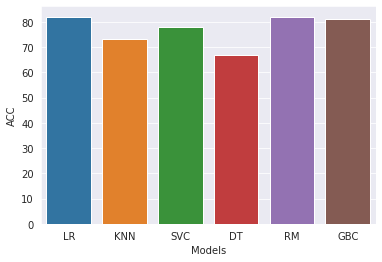

In [ ]:
sns.barplot(final_data['Models'], final_data['ACC'])

Saving the model

In [ ]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(pca_fit,y)

GradientBoostingClassifier()

In [ ]:
import joblib

In [ ]:
joblib.dump(gbc_model, "Behavioural_disorder_prediction")

['Behavioural_disorder_prediction']

In [ ]:
model = joblib.load('Behavioural_disorder_prediction')

In [ ]:
p= model.predict(pca1.transform([[0,3,0,3,0,3,2,0,2,3,3,3,3,3,3,0]])) #This array can be changed according to the encoded values of the Options selected by the user

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [ ]:
if p[0]==1:
  print('High Chance of Having disorder')
else:
  print('Low chance of Having disorder')

Low chance of Having disorder


#####Creation of a GUI Interface will be added later! THANKYOU

In [ ]:
import pickle

ML Pipelines

In [ ]:
#trf1 = ColumnTransformer([
    #('scale',MinMaxScaler(), slice(1,16))
#])

In [ ]:
#trf2 = SelectKBest(score_func=chi2, k=14)

In [ ]:
#trf3 = DecisionTreeClassifier()

create pipeline

In [ ]:
#pipe = Pipeline([
    #('trf1', trf1),
    #('trf2', trf2),
   # ('trf3', trf3)
#])

In [ ]:
#pipe = make_pipeline(trf1,trf2,trf3)

In [ ]:
#from sklearn import set_config
#set_config(display='diagram')

In [ ]:
#pipe.named_steps